In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Read possum data to dataframe

In [2]:
possum = pd.read_csv('possum.csv')

In [3]:
possum.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
possum.dtypes

case          int64
site          int64
Pop          object
sex          object
age         float64
hdlngth     float64
skullw      float64
totlngth    float64
taill       float64
footlgth    float64
earconch    float64
eye         float64
chest       float64
belly       float64
dtype: object

In [5]:
possum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [6]:
possum.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [7]:
possum.value_counts('site')

site
1    33
7    18
2    13
5    13
6    13
3     7
4     7
dtype: int64

In [8]:
possum.value_counts('Pop')

Pop
other    58
Vic      46
dtype: int64

In [9]:
possum.value_counts('sex')

sex
m    61
f    43
dtype: int64

In [10]:
print(possum.select_dtypes("object").head())

   Pop sex
0  Vic   m
1  Vic   f
2  Vic   f
3  Vic   f
4  Vic   f


In [11]:
print(possum['Pop'].nunique())

2


## Visualization of value distribution

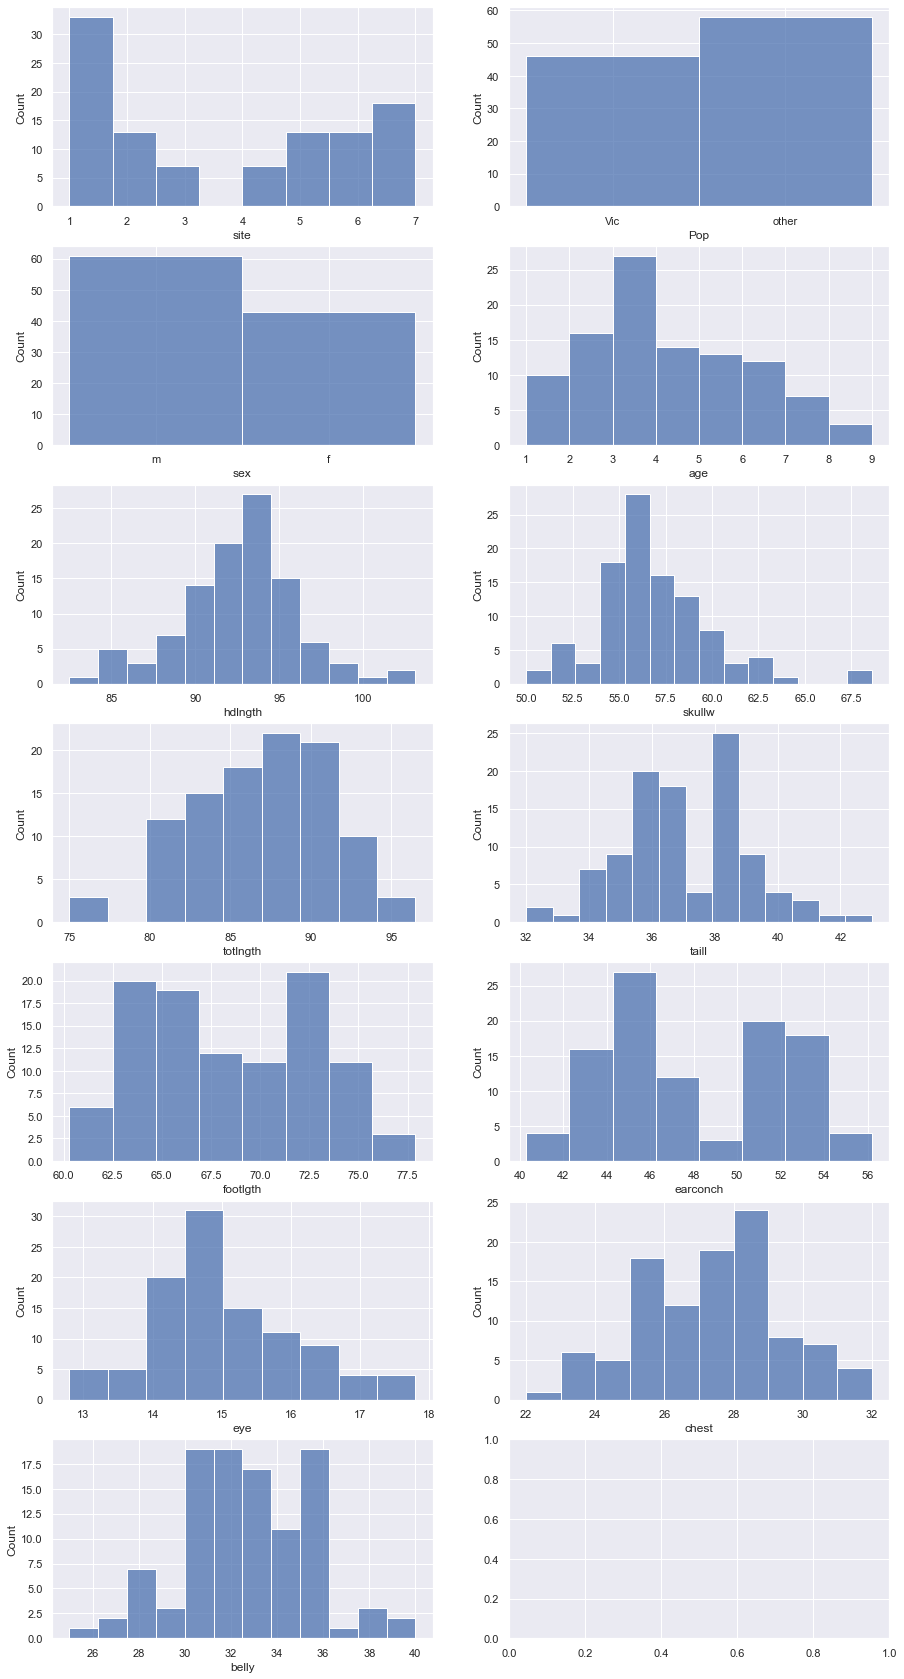

In [12]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(7, 2, figsize=(15, 30))
sns.histplot(data=possum, x='site', ax=axs[0, 0])
sns.histplot(data=possum, x='Pop', ax=axs[0, 1])
sns.histplot(data=possum, x='sex', ax=axs[1, 0])
sns.histplot(data=possum, x='age', ax=axs[1, 1])
sns.histplot(data=possum, x='hdlngth', ax=axs[2, 0])
sns.histplot(data=possum, x='skullw', ax=axs[2, 1])
sns.histplot(data=possum, x='totlngth', ax=axs[3, 0])
sns.histplot(data=possum, x='taill', ax=axs[3, 1])
sns.histplot(data=possum, x='footlgth', ax=axs[4, 0])
sns.histplot(data=possum, x='earconch', ax=axs[4, 1])
sns.histplot(data=possum, x='eye', ax=axs[5, 0])
sns.histplot(data=possum, x='chest', ax=axs[5, 1])
sns.histplot(data=possum, x='belly', ax=axs[6, 0])
plt.show()

## Handle missing data

#### count missing values

In [13]:
#print(possum.isna())
print(possum.isna().sum())

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [14]:
print(possum[possum.isna().any(axis=1)])

    case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
40    41     2  Vic   f  5.0     88.4    57.0      83.0   36.5       NaN   
43    44     2  Vic   m  NaN     85.1    51.5      76.0   35.5      70.3   
45    46     2  Vic   m  NaN     91.4    54.4      84.0   35.0      72.8   

    earconch   eye  chest  belly  
40      40.3  15.9   27.0   30.5  
43      52.6  14.4   23.0   27.0  
45      51.2  14.4   24.5   35.0  


#### calculate treshold

In [15]:
treshold = len(possum) * 0.05
print(treshold)

5.2


#### drop missing values <= treshold

In [16]:
print(possum.columns)
cols_to_drop = possum.columns[possum.isna().sum() <= treshold]
print(cols_to_drop)

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')
Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [17]:
possum.dropna(subset=cols_to_drop, inplace=True)

In [18]:
print(possum.isna().sum())

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


## Insights to find

### Can we use total length to predict a possum's head length?

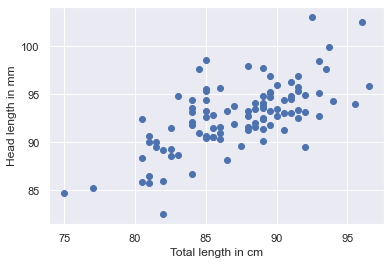

In [19]:
plt.scatter(possum['totlngth'], possum['hdlngth'])
plt.xlabel('Total length in cm')
plt.ylabel('Head length in mm')
plt.show()

#### Simple Linear regression for predicting head length from total length

In [20]:
X = possum.iloc[:, 7].values
y = possum.iloc[:, 5].values

In [21]:
X = np.reshape(X, (len(X), 1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [23]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

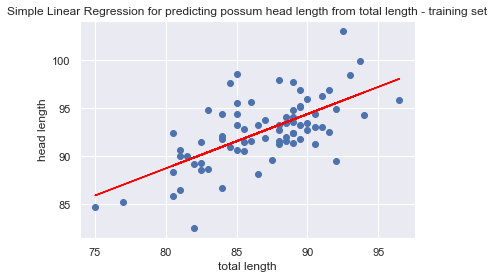

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Simple Linear Regression for predicting possum head length from total length - training set')
plt.xlabel('total length')
plt.ylabel('head length')
plt.show()

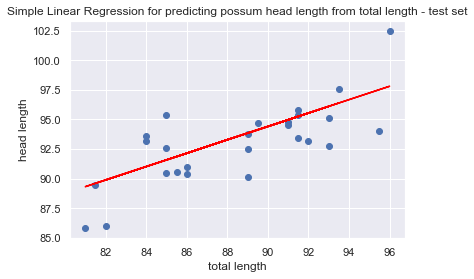

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Simple Linear Regression for predicting possum head length from total length - test set')
plt.xlabel('total length')
plt.ylabel('head length')
plt.show()

In [26]:
print(r2_score(y_test, y_pred))

0.5342726375167035


#### => conclusion: LinearRegression may work, but try another algorithmn or add features (TODO)

#### Decision Tree regression for predicting head length from total length

In [27]:
dec_tree_regressor = DecisionTreeRegressor(random_state=0)
dec_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [28]:
y_pred_dec_tree = dec_tree_regressor.predict(X_test)

In [29]:
print(r2_score(y_test, y_pred_dec_tree))

0.39465907789291343


#### => Conclusion: Decision Tree Regression performs worse!

#### Random Forest Regression

In [30]:
rf_regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [31]:
y_pred_rf = rf_regressor.predict(X_test)

In [32]:
print(r2_score(y_test, y_pred_rf))

0.4047032441220848


#### => Conclusion: seems to be not suitable as well

#### SVR regression for predicting head length from total length

In [33]:
X = possum.iloc[:, 7].values
y = possum.iloc[:, 5].values

In [34]:
X = np.reshape(X, (len(X), 1))
y = np.reshape(y, (len(y), 1))

In [35]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [38]:
y_pred = sc_y.inverse_transform(regressor.predict(X_test))

In [39]:
print(r2_score(sc_y.inverse_transform(y_test), y_pred))

0.5270578644499222


#### => Conclusion: SVR slightly worse than Simple Linear Regression

### Which possum body dimensions are most correlated with sex and age?

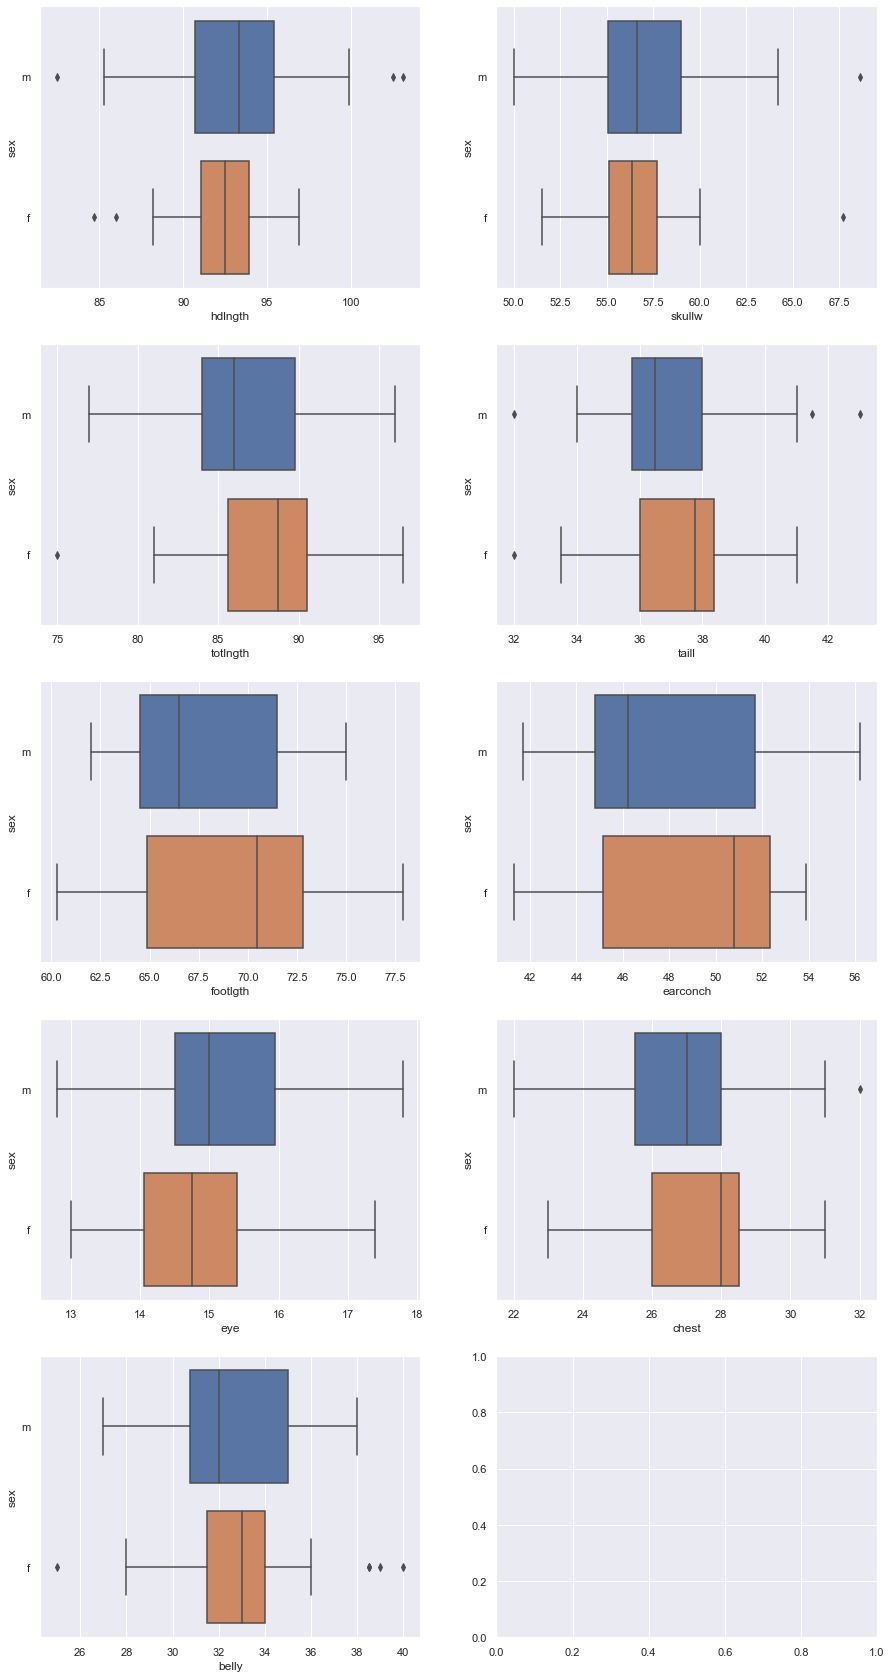

In [40]:
fig, axs = plt.subplots(5, 2, figsize=(15, 30))
sns.boxplot(data=possum, x='hdlngth', y='sex', ax=axs[0, 0])
sns.boxplot(data=possum, x='skullw', y='sex', ax=axs[0, 1])
sns.boxplot(data=possum, x='totlngth', y='sex', ax=axs[1, 0])
sns.boxplot(data=possum, x='taill', y='sex', ax=axs[1, 1])
sns.boxplot(data=possum, x='footlgth', y='sex', ax=axs[2, 0])
sns.boxplot(data=possum, x='earconch', y='sex', ax=axs[2, 1])
sns.boxplot(data=possum, x='eye', y='sex', ax=axs[3, 0])
sns.boxplot(data=possum, x='chest', y='sex', ax=axs[3, 1])
sns.boxplot(data=possum, x='belly', y='sex', ax=axs[4, 0])
plt.show()